## ImageNet-9 Paintings BG

Painting

In [43]:
import os
import numpy as np
import random
import pandas as pd
from PIL import Image
from tqdm import tqdm
import itertools

Image.MAX_IMAGE_PIXELS = 933120000

Change the paths below.

In [24]:
fg_dir = "/datasets/imagenet_bg_challenge/only_fg/val"
mask_dir = "/datasets/imagenet_bg_challenge/fg_mask/val"
bg_dir = "/datasets/paintings_raw/"
outdir = "/datasets/imagenet_bg_challenge/paintings_bg/val/"
os.makedirs(outdir, exist_ok=True)

classes = os.listdir(fg_dir)
bgs = [os.path.join(bg_dir, p) for p in os.listdir(bg_dir)]
bgs_inf = (bg for i in itertools.count() for bg in bgs )
classes

['07_primate',
 '04_carnivore',
 '01_bird',
 '03_reptile',
 '06_musical instrument',
 '00_dog',
 '05_insect',
 '08_fish',
 '02_wheeled vehicle']

In [44]:
for cls in classes:
    class_fg_dir = os.path.join(fg_dir, cls)
    class_mask_dir = os.path.join(mask_dir, cls)
    class_outdir = os.path.join(outdir, cls)
    os.makedirs(class_outdir, exist_ok=True)
    for img_name in tqdm(os.listdir(class_fg_dir)):
        img_path = os.path.join(class_fg_dir, img_name)
        mask_name = img_name.split(".")[0] + ".npy"
        mask_path = os.path.join(class_mask_dir, mask_name)
        save_path = os.path.join(class_outdir, img_name)
        bg_path = next(bgs_inf)
        
        img = Image.open(img_path).resize((224, 224))
        bg_img = Image.open(bg_path).resize((224, 224))
        mask = np.load(mask_path)
        bg_arr = np.asarray(bg_img)
        if len(bg_arr.shape) == 2:
            bg_arr = bg_arr[..., None]
        elif bg_arr.shape[2] == 4:
            bg_arr = bg_arr[:, :, :3]
        img_arr = np.asarray(img)
        new_img = bg_arr * (1 - mask[..., None]) + img_arr * mask[..., None]
        img = Image.fromarray(new_img.astype(np.uint8))
        img.save(save_path)

100%|██████████| 450/450 [00:11<00:00, 38.66it/s]


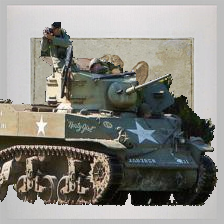

In [48]:
img

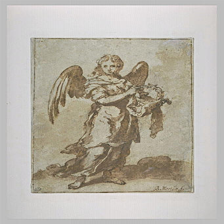

In [49]:
bg_img